# Introduction to neural network classification with TendorFlow

In this notebook, we are going to learn how to write neural networks for classififcation problems

A classififcation is where you try to classify something as one thing or another

A few types of classification problems:
* Binary classification
*Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# make 100 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [ ]:
# Check out features

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check out labels
y[:40]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0])

Our data is difficult to understand, let's visualize it

In [ ]:
import pandas as pd

circles = pd.DataFrame({"X0": X[:,0], "X1":X[:,1], "Label":y})
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


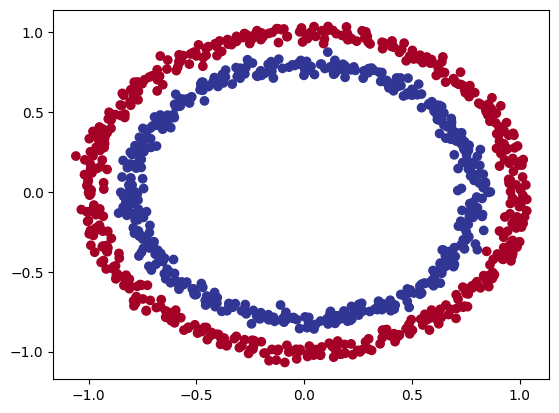

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c = y, cmap = plt.cm.RdYlBu )

Excercise: Neural Network playground: https://playground.tensorflow.org/#activation=relu&batchSize=30&dataset=spiral&regDataset=reg-plane&learningRate=0.003&regularizationRate=0&noise=0&networkShape=5,2&seed=0.40660&showTestData=false&discretize=false&percTrainData=20&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false

## Input and output shapes

In [ ]:
# Check the shape of features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Check how many sampels we are working with
len(X), len(y)

(1000, 1000)

In [ ]:
# View the firts example of featres and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

## Steps in modeling

The steps in modeling with TensorFlow:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweek the model
6. Evaluate the model ......

In [ ]:
# Import TensorFlow
import tensorflow as tf

tf.__version__

'2.18.0'

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential api
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']
)

# 3. Fit the modle
model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4457 - loss: 6.3019
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4375 - loss: 5.4872
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4419 - loss: 5.3009
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4468 - loss: 5.0441
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4407 - loss: 4.6115


In [ ]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs = 200, verbose = 0)
model_1.evaluate(X, y)

# loss = 0.6932879686355591, accurracy = 0.4729999899864197

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

Since we are working on a binary classification problem and our model is getting around 50% accuracy, its performing as its guessing,

Let's add another layer to the model


In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)

# 3. Fit the model
model_2.fit(X, y, epochs = 200, verbose = 0)

In [ ]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4955 - loss: 0.6935


[0.6932398676872253, 0.5]

## Improve our model

1. Create a model - add more layers or increase the number of hidden units within a layer
2. Compile a model - choose a different optimization function such as Adam instead of SGD
3. Fit a model - fit model with more epochs and train for longer

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),    # add 100 dense neurons
    tf.keras.layers.Dense(10),     # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# 3. Fit the model
model_3.fit(X, y, epochs = 100, verbose = 0)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5073 - loss: 0.6915


[0.695120096206665, 0.4880000054836273]

To visualize the model's predictions, let's create a function 'plot_decision_boundary()', this finction will

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make prediction across the meshgrid
* Plot the predictions as well as the line between different zones (where each unique class falls)



In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, x, y):

  """ draw a decision boundary created by a model predicting on X
  This function is inspired by 2 resources
  1. https://cs231n.github.io/neural-networks-case-study/
  2. https://github.com/mikefil93/madewithML-basics
  """
  # Define the axis boundary of the plot and create a meshgrid
  x_min, x_max = x[:,0].min() - 0.1, x[:,0].max()+0.1
  y_min, y_max = x[:,1].min() - 0.1, x[:,1].max()+0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
              np.linspace(y_min, y_max, 100))

  # Create X values (we are going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multi-class classification")
    # we have to reshape our prediction to make them ready for plotting
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(x[:,0], x[:,1], c=y, s=10, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

np.c() - stack 2-D array together https://numpy.org/doc/2.2/reference/generated/numpy.c_.html

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


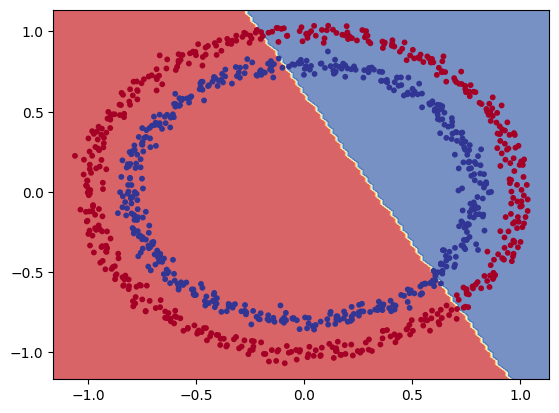

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model = model_3, x=X, y=y)

resources: https://cs231n.github.io/neural-networks-case-study/

In [ ]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max()+0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max()+0.1
x_min, x_max, y_min, y_max

(np.float64(-1.1595024599098636),
 np.float64(1.1337117525463374),
 np.float64(-1.1677683182718437),
 np.float64(1.1360036756154805))

In [ ]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
              np.linspace(y_min, y_max, 100))

xx, yy

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

In [ ]:
# Let's see if our model can be used for regression problem
import tensorflow as tf

tf.random.set_seed(42)

# Create some regresssion data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)    # y = X+100

X_regression, y_regression

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to regression data
model_3.fit(X_reg_train, y_reg_train, epochs = 100)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_2_1/Cast:0", shape=(None,), dtype=float32). Expected shape (None, 2), but input has incompatible shape (None,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None,), dtype=int32)
  • training=True
  • mask=None

This will not work because the loss function for previous model for binary classification is BinaryCrossEntropy(), so we need to change the loss function specifically for regression (mae)

In [ ]:
X_reg_train.shape, X_reg_test.shape, y_reg_train.shape, y_reg_test.shape

(TensorShape([150]), TensorShape([50]), TensorShape([150]), TensorShape([50]))

In [ ]:
len(X_regression), len(y_regression)

(200, 200)

We compile our model_3 for binary classification problem (losses = BinaryCrossentropy), But when we are working in regression problem, let's change por model to suite our data

In [ ]:
# set up random seed
tf.random.set_seed(42)

# 1. Create the modle
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, with a regression specific loss function
model_3.compile(loss = tf.keras.losses.mae,
        optimizer = tf.keras.optimizers.Adam(),
        metrics = ['mae'])

# 3. Fit the model
history = model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs = 100, verbose = 0)

Text(0.5, 0, 'eposchs')

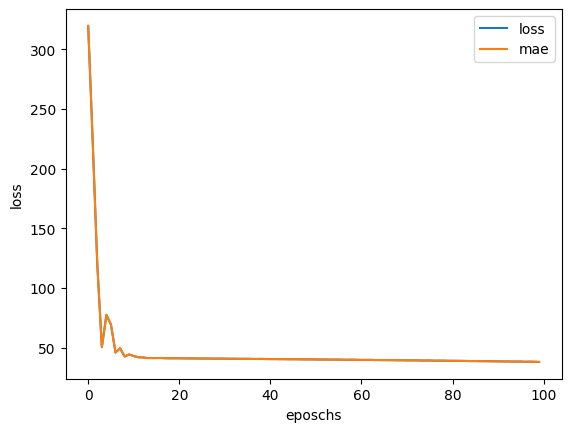

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("eposchs")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


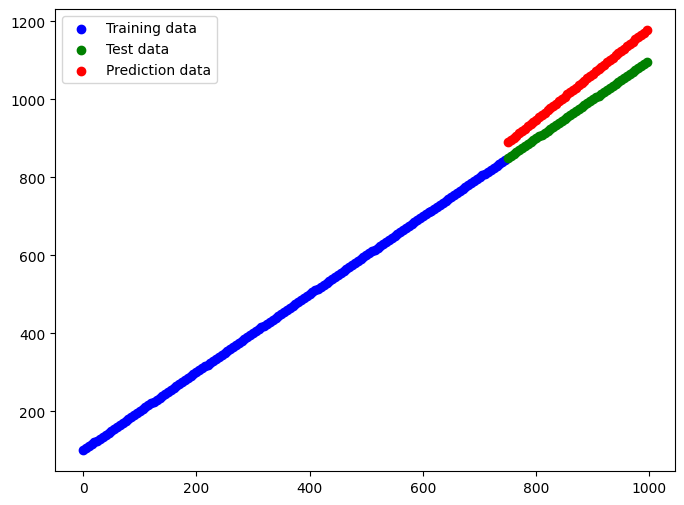

In [ ]:
# Make predictions with our trained model
y_reg_pred = model_3.predict(X_reg_test)

# Plot the model's prediction against our regression data
plt.figure(figsize = (8,6))
plt.scatter(X_reg_train, y_reg_train, c = 'b', label = "Training data")
plt.scatter(X_reg_test, y_reg_test, c = 'g', label = "Test data")
plt.scatter(X_reg_test, y_reg_pred, c = 'r', label = "Prediction data")
plt.legend()
plt.show()

In [ ]:
## The missing piece: Non-linearity

# set the random seed
tf.random.set_seed(42)

# 1. Create the mdoel
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(19),
    tf.keras.layers.Dense(1, activation = "linear")
])

# 2. Compile the model
model_4.compile(
    loss = "BinaryCrossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs = 100, verbose = 0)

Text(0.5, 0, 'eposchs')

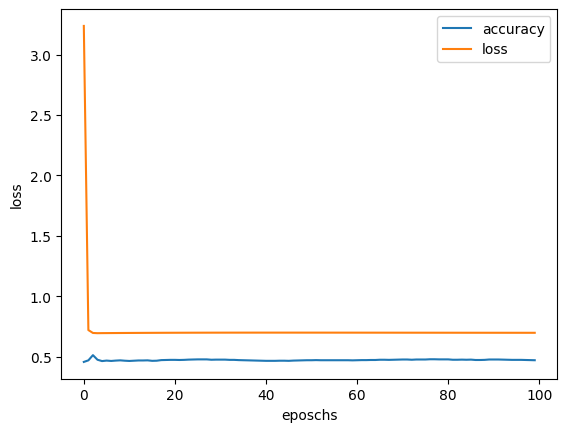

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("eposchs")

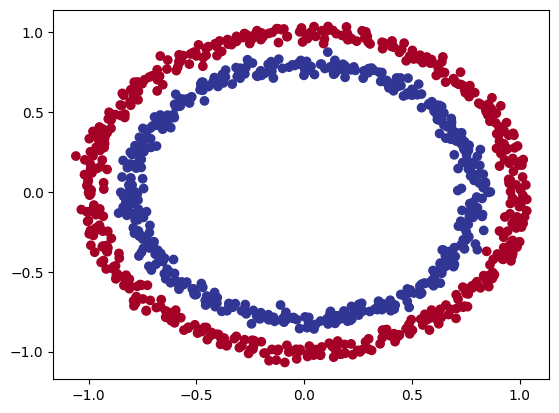

In [ ]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


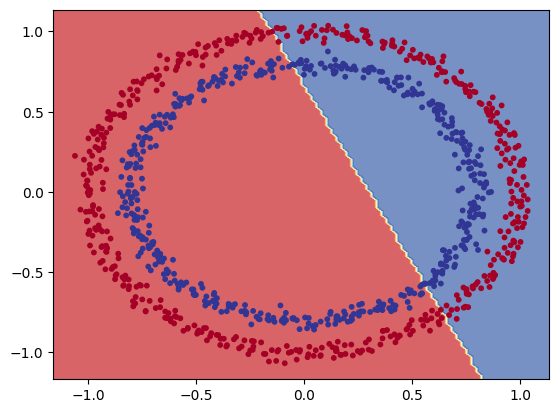

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model = model_4, x=X, y=y)

Let's try to build our first neural network with a non-linear activation function

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu),  # default activation = non)
])

# 2. Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
        metrics = ["accuracy"])

# 3. Fit the model
model_5.fit(X, y, epochs = 100, verbose = 0)

In [ ]:
# Time to replicate the multilayer neyral network from Tensorflow playground
import tensorflow as tf

# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

# 3. Fit the model
history = model_6.fit(X, y, epochs = 200, verbose = 0)

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4955 - loss: 8.1322


[8.059046745300293, 0.5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


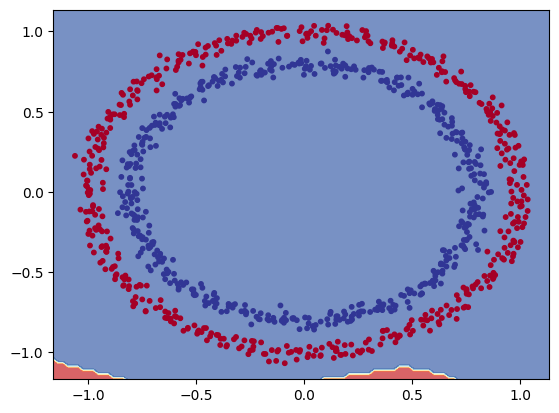

In [ ]:
plot_decision_boundary(model = model_6, x=X, y=y)

For binary classification, we use Sigmoid activation

For multi-class classification, we use Softmax activation

In [ ]:
# Refine model_6 by adding an activation function in the output layer

# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compile the model
model_7.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

# 3. Fit the model
model_7.fit(X, y, epochs = 200, verbose = 0)

In [ ]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 8.9391e-04


[0.0007641169358976185, 1.0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


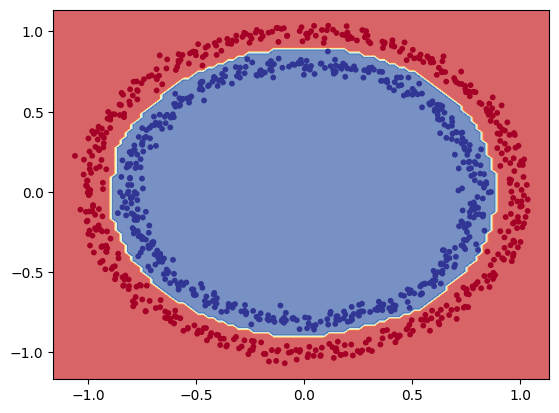

In [ ]:
plot_decision_boundary(model = model_7, x=X, y=y)

The model is perfect

**Question:** What is wrong with the prediction we make, are we really evaluating our model correctly ?

Whar data do the model lean on and what data do w predict on ?

**Note:** The combination of **linear and non-linear functions** is one of the key fundamentals of neural networks

Now we have dicussed the concept of linear and non-linear functions, let's see them in action

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

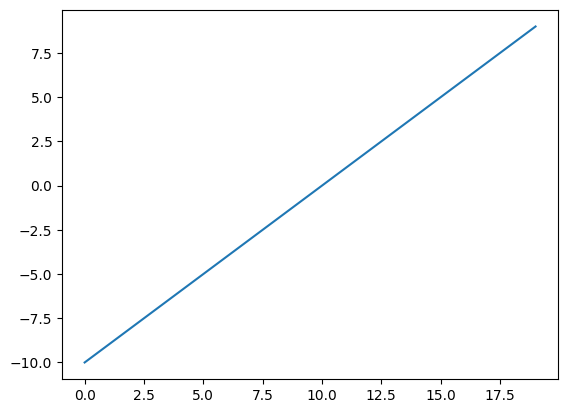

In [ ]:
# Visualize our toy tensor
plt.plot(A)

**Activation functions**

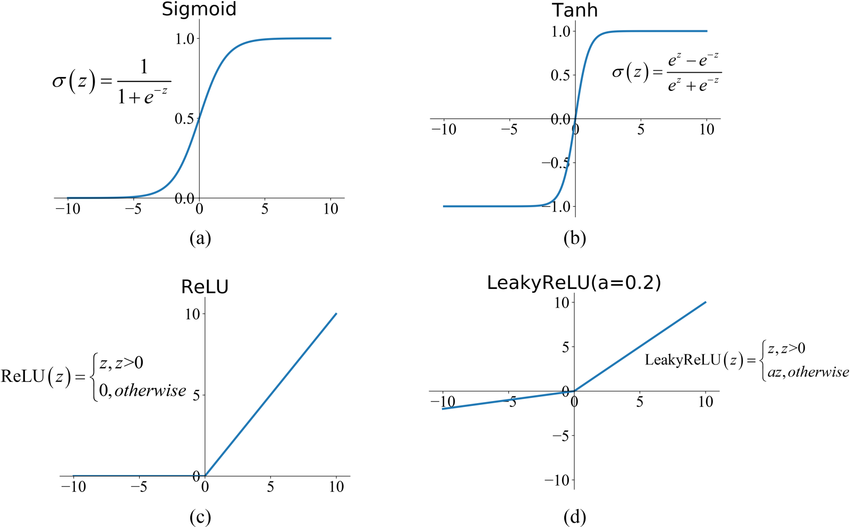

[**sigmoid activation function**](https://www.tensorflow.org/api_docs/python/tf/math/sigmoid)

In [ ]:
# Let's start by replicating sigmoid(X) = 1 / 1 + exp(-X)
def sigmoid(X):
  return 1 / (1 + tf.exp(-X))

In [ ]:
# sue sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

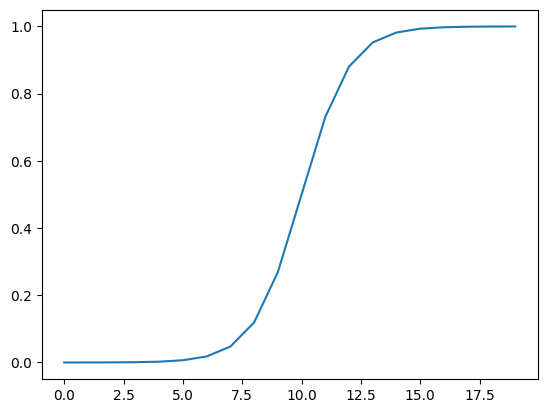

In [ ]:
# Plot our toy tensor transformed by sigmoid function
plt.plot(sigmoid(A))

[**relu activation function**](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)

The ReLU function is defined as f(x)=max (0,x)

This means:      If the input \(x\) is positive, the output is \(x\). If the input \(x\) is negative, the output is \(0\).

In [ ]:
# Let's recreate the relu functions

def relu(X):
  return tf.maximum(0, X)

In [ ]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

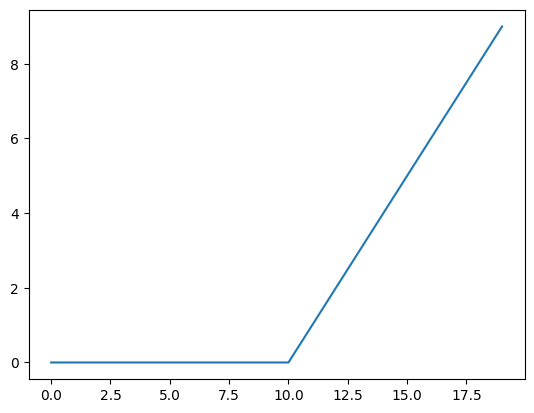

In [ ]:
# Plot our toy tensor transformed by relu function
plt.plot(relu(A))

In [ ]:
# Let's try the linear activation function
A, tf.keras.activations.linear(A), A == tf.keras.activations.linear(A)

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       dtype=float32)>,
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       dtype=float32)>,
 <tf.Tensor: shape=(20,), dtype=bool, numpy=
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True])>)

The linear activation function does not change the original tensor (do nothing)

Cheatsheet for activatiown finctions in machine learning: https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

## Evaluating and improving our classfication model

So far we have been training and tesitng on the same dataset

However, in machine learning, this is basically a sin

So, let's create a training and test set

In [ ]:
# Check how many examples we have
len(X)

1000

In [ ]:
# Split into train an test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

# X ndim = 2, y ndim = 1

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Train the new model on training ata and evaluate the model on the test data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
    ])

# 2. Compile the model (same as model_7)
model_8.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ["accuracy"]
)

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs = 25, verbose = 1)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5199 - loss: 0.6905
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5297 - loss: 0.6854
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5341 - loss: 0.6803
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5460 - loss: 0.6735
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5589 - loss: 0.6626
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5790 - loss: 0.6481
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6072 - loss: 0.6336 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6222 - loss: 0.6200 
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6575 - loss: 0.6011
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7693 - loss: 0.5647 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7798 - loss: 0.5308 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7976 

Text(0.5, 0, 'eposchs')

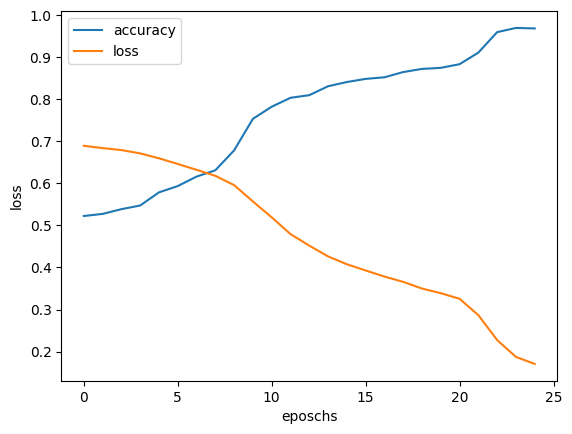

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("eposchs")

In [ ]:
# 4. Evaluate the model_8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9757 - loss: 0.1842


[0.18639487028121948, 0.9750000238418579]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


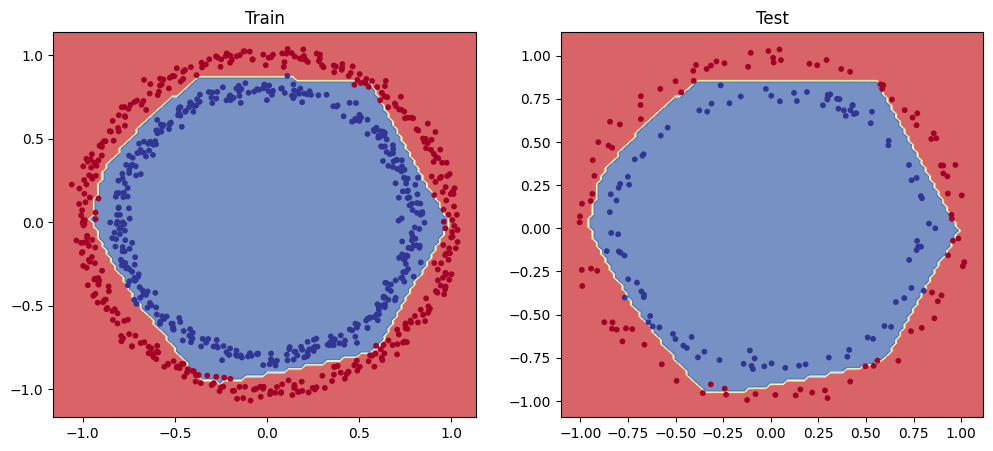

In [ ]:
# Plot the decision boundary for the training and test dataset
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, x = X_train, y = y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, x = X_test, y = y_test)

## Plot the loss (or training) curve

In [ ]:
history.history

{'accuracy': [0.5224999785423279,
  0.5274999737739563,
  0.5387499928474426,
  0.5475000143051147,
  0.5787500143051147,
  0.59375,
  0.6162499785423279,
  0.6312500238418579,
  0.6787499785423279,
  0.7537500262260437,
  0.7825000286102295,
  0.8037499785423279,
  0.8100000023841858,
  0.831250011920929,
  0.8412500023841858,
  0.8487499952316284,
  0.8525000214576721,
  0.8650000095367432,
  0.8725000023841858,
  0.875,
  0.8837500214576721,
  0.9112499952316284,
  0.9599999785423279,
  0.9700000286102295,
  0.96875],
 'loss': [0.6895700693130493,
  0.6840774416923523,
  0.6793574690818787,
  0.6714922189712524,
  0.6597650647163391,
  0.646314799785614,
  0.6323810815811157,
  0.6180902719497681,
  0.595914363861084,
  0.5571049451828003,
  0.5193457007408142,
  0.47943374514579773,
  0.4520564377307892,
  0.4263074994087219,
  0.40768492221832275,
  0.3929141163825989,
  0.3783968389034271,
  0.3657498061656952,
  0.34988853335380554,
  0.3388363718986511,
  0.325565904378891,
  0

In [ ]:
# Convert a history object into a DataFrame
pd.DataFrame(history.history)

,accuracy,loss
0,0.52250,0.689570
1,0.52750,0.684077
2,0.53875,0.679357
3,0.54750,0.671492
4,0.57875,0.659765
5,0.59375,0.646315
6,0.61625,0.632381
7,0.63125,0.618090
8,0.67875,0.595914
9,0.75375,0.557105


Text(0.5, 0, 'epochs')

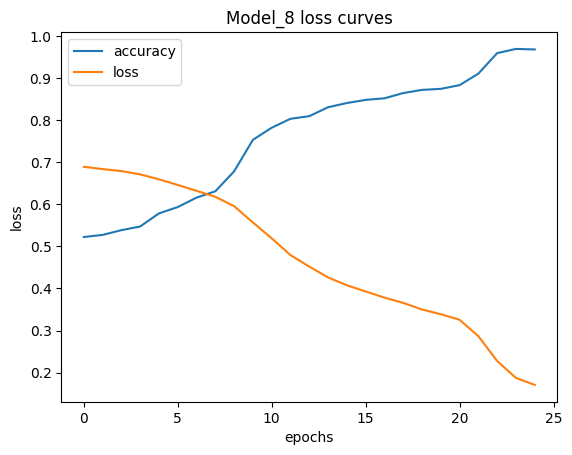

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")

**Note:** For many problems, te loss function going down means the model is improving, (the prediction its makign is getting closer to the ground truth labels)

## Finding the best learning rate

To dinf the ideal learning rate (the learing rate where loss decrease the most during training), we are going to use the following steps:
* A learning rate **callback** - yu can think of callback as an extra piece of functionality that can add to your **while** it's training
* We can use the same one as above, but we are practicing buildong models here
* A modified loss curve plot


In [ ]:
# set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_9.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Create a learning _rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))


# Fit the model (passing lt_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4778 - loss: 0.6992 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4765 - loss: 0.6990 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4699 - loss: 0.6989 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4651 - loss: 0.6987 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4629 - loss: 0.6986 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4632 - loss: 0.6984 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4632 - loss: 0.6982 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4636 - loss: 0.6980 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4622 - loss: 0.6978 - learning_

<Axes: xlabel='epochs'>

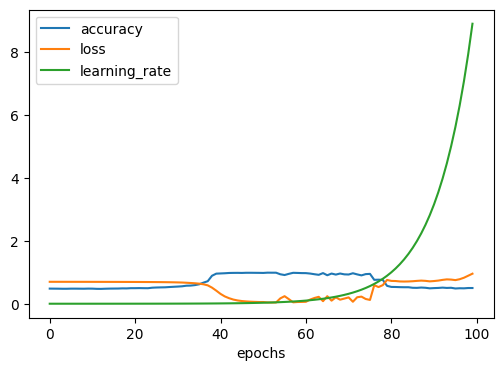

In [ ]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize = (6,4), xlabel = "epochs")

**Loss (Orange)**
This is the most important curve for this experiment. Initially, as the learning rate increases, the loss decreases, which indicates that the model is learning effectively. However, around epoch 60, the loss starts to become unstable and then rises sharply. This is the point where the learning rate has become too high, causing the model's performance to worsen.

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * 10**(tf.range(100)/20)
len(lrs)

# we have 100 differet learnign rates (each epoch has a different learning rate, we hace 100 epochs)

100

In [ ]:
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning rate vs loss')

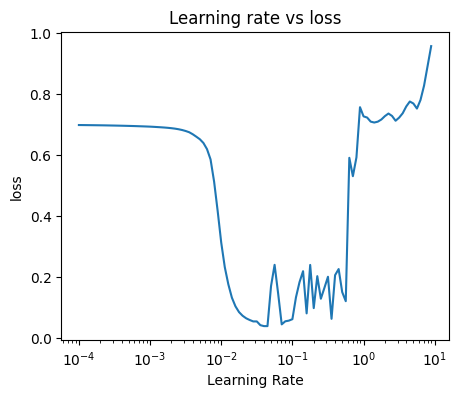

In [ ]:
plt.figure(figsize = (5,4))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("loss")
plt.title("Learning rate vs loss")

primary goal of this plot is to identify the optimal learning rate.

The ideal range is typically just before the point where the loss is at its lowest and starts to increase.

In [ ]:
# Examples of other typical larning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# let's try to use a "higher" ideal learning rate with the same model as before

# set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_10.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
    metrics = ['accuracy']
)

# Fit the model
model_10.fit(X_train, y_train, epochs = 25, verbose = 1)


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4498 - loss: 0.7131
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5031 - loss: 0.6928
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5027 - loss: 0.6907
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5251 - loss: 0.6860
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5404 - loss: 0.6799
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5369 - loss: 0.6722
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5614 - loss: 0.6664
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5691 - loss: 0.6591
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5748 - loss: 0.6516
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5752 - loss: 0.6467
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5769 - loss: 0.6437
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5816 - lo

In [ ]:
# Evaluate model_8 and model_10 on test datasets to see if model_10 improves by setting the optimal learning_rate = 0.02
model_8.evaluate(X_test, y_test), model_10.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9757 - loss: 0.1842 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5908 - loss: 0.6239


([0.18639487028121948, 0.9750000238418579],
 [0.6317031383514404, 0.574999988079071])

## Moreb classification evaluation methods

Alongside visulizing our model's result as much as possible, there are a handful of other classification evaluation metods and metrics you should be familiar with

* Accuracy: (tp + tn) / (tf + tp + fn + fp)
* Precision: tp / (tp + fp)
* Recall: tp / (tp + fn)
* f1_score: 2* (accuracy * precision) / (accuracy + precision)
* Confusion matrix
* Classification report (from sklearn)

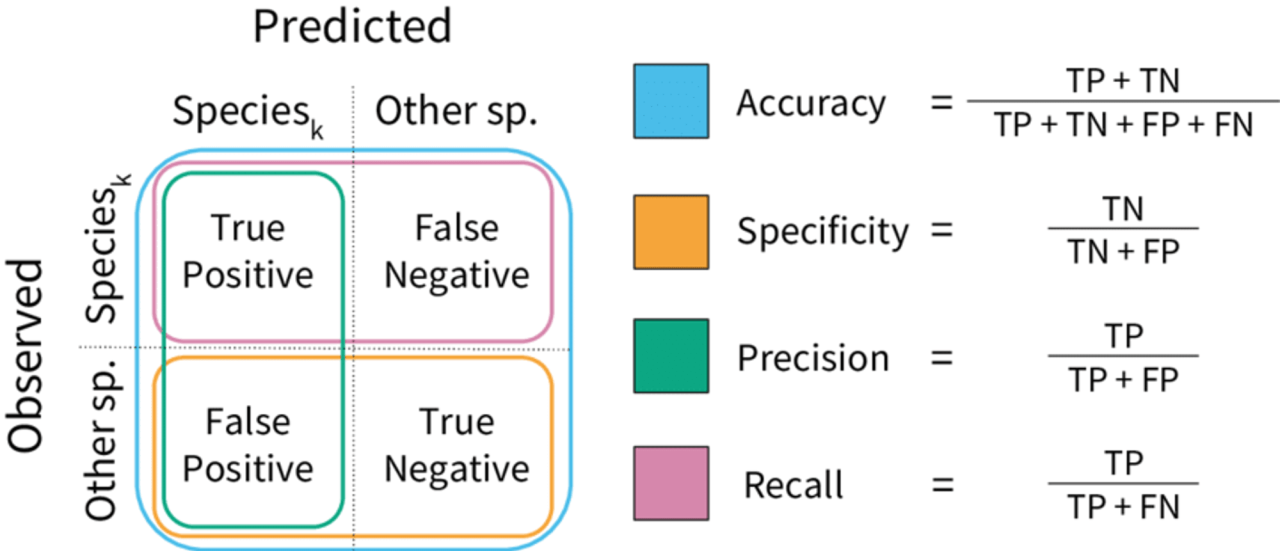

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"model loss: {loss}")
print(f"model accuracy {(accuracy*100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5908 - loss: 0.6239 
model loss: 0.6317031383514404
model accuracy 57.50%


How about a confusion matrix?

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

In [ ]:
# make predictions
y_pred = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_pred, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [ ]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
y_pred[:10]

array([[0.5513125 ],
       [0.06644861],
       [0.5513125 ],
       [0.41780514],
       [0.5513125 ],
       [0.5513125 ],
       [0.5513125 ],
       [0.5513125 ],
       [0.5513125 ],
       [0.03587291]], dtype=float32)

Our predictions array has come out in **prediction probability** form, the standard output from sigmoid or softmax activation functions


In [ ]:
# Convert or prediction probability to binary format and view the first 10
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_pred))

array([[23, 77],
       [ 8, 92]])

In [ ]:
confusion_matrix(tf.round(y_pred), y_test) == confusion_matrix(y_test, tf.round(y_pred))

array([[ True, False],
       [False,  True]])

The order affect the output of the confusion matrix

* argument 1: y axis - observed (y_true)
* argument 2: x axis - predicted value (y_pred)

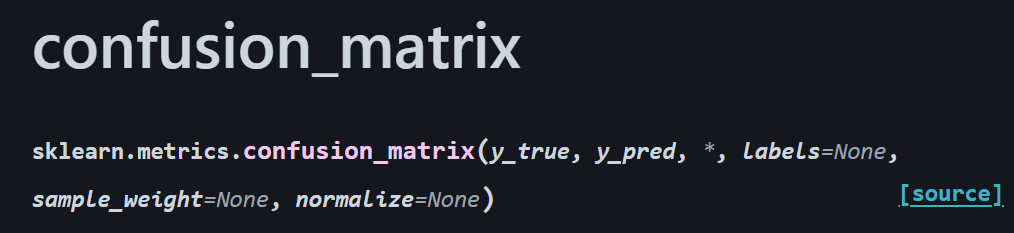

The confusion matrix code we are going to wrte is a remix of scikit-learn's plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

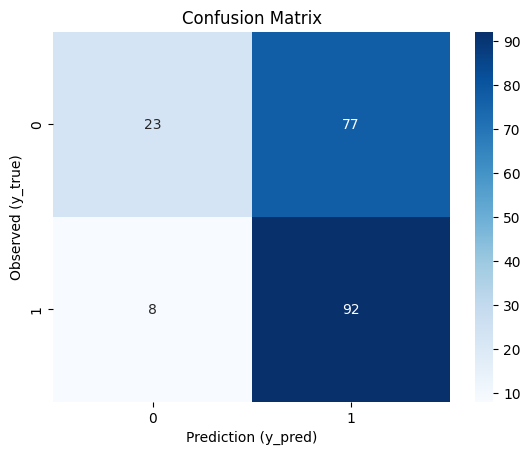

In [ ]:
# Visualize our confusion matrix
import seaborn as sns

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))

# Use sns.heatmap to plot confusion matrix
figsize = (3,3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel("Observed (y_true)")
plt.xlabel("Prediction (y_pred)")
plt.show()

## Working with larger example (multiclass classification)

When you have more than 2 classes as option, it's known as **multi-class classification**

Too practice milti-class classification, we are going to build a neural network to classify of different item of clothing


**TensorFlow datasets:** https://www.tensorflow.org/datasets?hl=zh-tw




In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and testing data for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Show the first training example
train_data[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [ ]:
# Check the shhape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

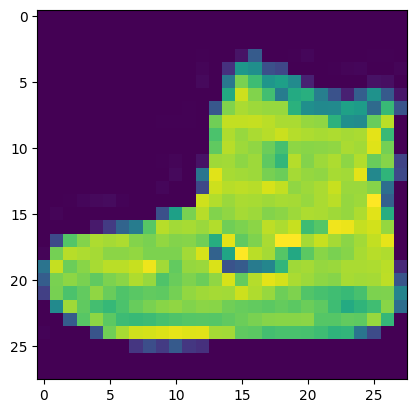

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

In [ ]:
# Check out sample label
train_labels[0]

np.uint8(9)

In [ ]:
# Create a small list so we can index onto our training labels so they are human-readible
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandle", "Short", "Sneaker", "Bag", "Ankle Boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt')

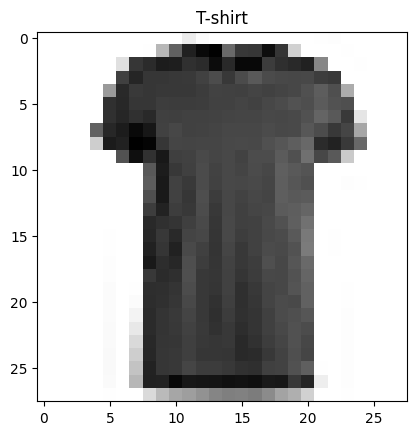

In [ ]:
# Plor an example image and its label
plt.imshow(train_data[17], cmap = plt.cm.binary)
plt.title(class_names[train_labels[17]])

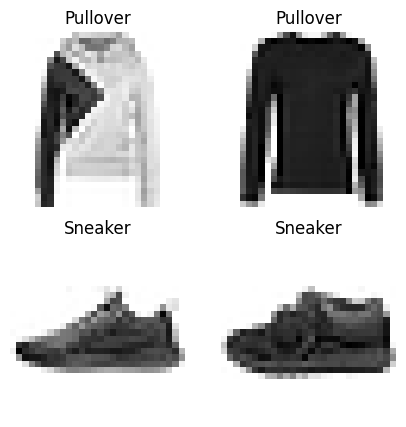

In [ ]:
# PLot multiple random imges of fashion_mnist
import random
plt.figure(figsize = (5,5))
for i in range(4):
  plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data))) # len(train_data) = 60000
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)
  plt.tight_layout

random.choice()
* Input:
It takes a sequence as an argument. This sequence can be a list, tuple, string, or range.
* Output:
It returns one randomly selected element from that sequence.

In [ ]:
len(train_data)

60000

## Building a multi-class classification model

For our multi-class classifcation model, we can use a simila4r architecture to our binary classifiers, however, we are going to tweak a few things:
* Input shape (28X28) the shape of a image
* Output shape = 10 (one fpr each class)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

* If your labels are one-hot encoded, use CategoricalCrossentropy()
* If not, use SparseCategoricalCrossentropy()

In [ ]:
train_data[0].shape, len(class_names)

((28, 28), 10)

In [ ]:
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

# The input shape is flattened form (28,28) to (None,784)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 784)

In [ ]:
train_labels[:10]               # they are not one-hot encoded, so they cannot be the inpt of CategorocalCrossentropy() function

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
tf.one_hot(train_labels, depth = 10)    # one hot encoded input can be used with CategoricalCrossentropy function()

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
import tensorflow as tf

# set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model
model_11.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),    # CategoricalCrossentropy requires input to be one-hot encoded
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
non_norm_history = model_11.fit(train_data,
                 train_labels,
                 epochs = 10,
                 verbose = 1,
                 validation_data = (test_data, test_labels)
                 )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0978 - loss: 2.8570 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0987 - loss: 2.3041 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0985 - loss: 2.3028

**tf.keras.layers.Flatten()** unrolls or "flattens" a multi-dimensional input into a single one-dimensional vector, without affecting the batch size.
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten

**validation_data** in model.fit()

This is an automated evaluation that runs at the end of every epoch during the training process.

Purpose: To monitor the model's performance on unseen data in real-time as it learns.

Use Case: Its primary job is to help you detect overfitting and to provide a signal for tools like the EarlyStopping callback, which can automatically stop training when the validation performance no longer improves.

**model.evaluate()**

This is a manual, one-time evaluation that you call after the model has finished training.

Purpose: To get the final performance metrics of your trained model on a completely held-out test set.

Use Case: This provides the final, conclusive report on how well your model is expected to perform on brand new, unseen data. It's the step you take to formally score your finished model.

In short, think of validation_data as a continuous "spot check" during training, while model.evaluate() is the "final exam" after training is complete.

**During the training process, Keras reports two sets of metrics at the end of each epoch:**

* accuracy and loss: These metrics are calculated on the training data (train_data, train_labels). They show how well the model is learning from the data it's being trained on.

* val_accuracy and val_loss: These metrics are calculated on the validation data (test_data, test_labels). The val prefix stands for "validation." This dataset is not used for training the model; it's only used to evaluate the model's performance on unseen data after each epoch.

When shape err0or coor, check the following:
* input shape
* output shape
* loss function input criteria (ex. CategoricalCrossentropy(), SparseCategoricalCrossentropy())


In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [ ]:
# Check the min ad max value of the training data
tf.reduce_min(train_data), tf.reduce_max(train_data)

# min = 0, max = 255

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

Neural network prefer data to be scaled (or normalized), this mean they like the number in the tensors between 0 and 1

In [ ]:
# We can get our training and test data between 0 and 1 by deviding by the maximun
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / train_data.max()

train_data_norm.min(), train_data_norm.max(), test_data_norm.min(), test_data_norm.max()

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

In [ ]:
# Let's build a model using the normalized data

# set ramdom seed
tf.random.set_seed(42)

# Create the model (same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model
model_12.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm, train_labels, epochs = 10, validation_data = (test_data_norm,test_labels), verbose = 1)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4074 - loss: 1.5351 - val_accuracy: 0.7051 - val_loss: 0.8221
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7207 - loss: 0.7905 - val_accuracy: 0.7420 - val_loss: 0.7281
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7529 - loss: 0.7110 - val_accuracy: 0.7584 - val_loss: 0.6861
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7651 - loss: 0.6708 - val_accuracy: 0.7655 - val_loss: 0.6587
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7730 - loss: 0.6430 - val_accuracy: 0.7730 - val_loss: 0.6411
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7794 - loss: 0.6252 - val_accuracy: 0.7756 - val_loss: 0.6293
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7831 - loss: 0.6126 - val_accuracy: 0.7762 - val_loss: 0.6217
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7862 - loss: 0.6028 

**Note:** The model is improved by normalizing the input data, and neural networks tend to prefer normalized and numerical input data

Text(0.5, 1.0, 'loss curve of normalized input')

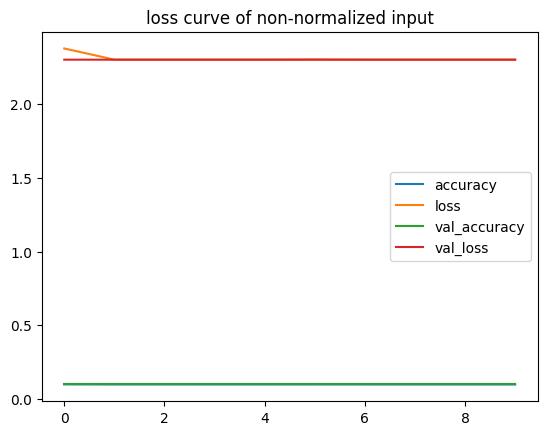

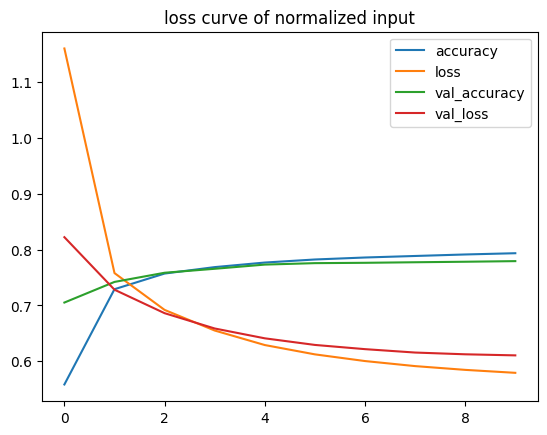

In [ ]:
import pandas as pd

# plot  non-normalized input loss curves
pd.DataFrame(non_norm_history.history).plot()
plt.title("loss curve of non-normalized input")

# plot normzlized input loss curves
pd.DataFrame(norm_history.history).plot()
plt.title("loss curve of normalized input")

**Note:** same model with even **slightly different data** can prouce **dramatically different results**. So when you are comparing models, ut's important to make sure you are comparing tjem on the same criteria (e.g. same architecture, but different data or same data but different architecture)

## Finding the ideal learning rate

In [ ]:
# set the random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape = (28,28)),
   tf.keras.layers.Dense(4, activation = "relu"),
   tf.keras.layers.Dense(4, activation = "relu"),
   tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile te model
model_13.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/10))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                 train_labels,
                 epochs = 40,
                 validation_data = (test_data_norm, test_labels),
                 callbacks = [lr_scheduler])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3672 - loss: 1.6627 - val_accuracy: 0.4772 - val_loss: 1.2701 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5081 - loss: 1.2062 - val_accuracy: 0.6409 - val_loss: 0.9390 - learning_rate: 0.0013
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6650 - loss: 0.8642 - val_accuracy: 0.7144 - val_loss: 0.7637 - learning_rate: 0.0016
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7276 - loss: 0.7281 - val_accuracy: 0.7285 - val_loss: 0.7294 - learning_rate: 0.0020
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7400 - loss: 0.6936 - val_accuracy: 0.7456 - val_loss: 0.6989 - learning_rate: 0.0025
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7468 - loss: 0.6712 - val_accuracy: 0.7619 - val_loss: 0.6743 - learning_rate: 0.0032
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7581 -

Text(0.5, 1.0, 'Finding ideal learning rate')

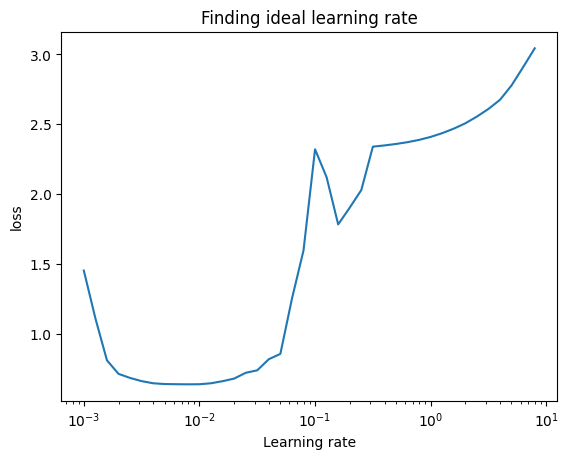

In [ ]:
# PLot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * 10**(tf.range(40)/10)
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.title("Finding ideal learning rate")

The best learning rate is around 1e-3 (0.0001) which is the default learning rate of the Adam optimizer

The divisor in the learning rate scheduler formula controls the trade-off between the speed and range of the search.

**Small Divisor** (e.g., 10) → Fast & Wide Search

The learning rate increases quickly, sweeping across a wide range of values (e.g., 10
−3
  to 10
1
 ).

This is effective for efficiently finding the general region of the optimal learning rate.

**Large Divisor** (e.g., 20) → Slow & Narrow Search

The learning rate increases slowly, providing more detailed loss information but only within a narrow range of low learning rates.

The primary risk is that the search is too slow to reach the optimal region, thus missing the best learning rate.

Conclusion: A smaller divisor is generally preferred for the initial search to quickly identify the correct ballpark for the learning rate.

In [ ]:
# Let's refit the model with the ideal learning rate
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model
model_14.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

# Fit the model
model_14.fit(train_data_norm, train_labels, validation_data = (test_data_norm, test_labels),epochs = 20, verbose = 1)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4170 - loss: 1.6400 - val_accuracy: 0.6757 - val_loss: 0.9827
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7035 - loss: 0.8850 - val_accuracy: 0.7390 - val_loss: 0.6969
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7512 - loss: 0.6724 - val_accuracy: 0.7633 - val_loss: 0.6401
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7713 - loss: 0.6226 - val_accuracy: 0.7732 - val_loss: 0.6162
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7860 - loss: 0.5997 - val_accuracy: 0.7804 - val_loss: 0.6029
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7928 - loss: 0.5854 - val_accuracy: 0.7846 - val_loss: 0.5950
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7969 - loss: 0.5736 - val_accuracy: 0.7886 - val_loss: 0.5902
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8012 - loss: 0.5650 - 

## Evaluating our multi-class classification model

To evaluate our multi-class classification mddel, we could:
* Evaluate its performance using other classification metrics (confusion matrix)
* Visualization
* Training it for longer, changing its architecture
* Save, export and use in application

Let's go through the top 2

In [ ]:
y_pred[:5], test_labels[:5]

(array([[0.5513125 ],
        [0.06644861],
        [0.5513125 ],
        [0.41780514],
        [0.5513125 ]], dtype=float32),
 array([9, 2, 1, 1, 6], dtype=uint8))

In [ ]:
y_pred.shape, test_labels.shape

((200, 1), (10000,))

In [ ]:
test_labels.min(), test_labels.max(),

(np.uint8(0), np.uint8(9))

In [ ]:
test_labels, tf.argmax(y_pred, axis=1)

(array([9, 2, 1, ..., 8, 1, 5], dtype=uint8),
 <tf.Tensor: shape=(200,), dtype=int64, numpy=
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])>)

In [ ]:
y_pred_model_14 = model_14.predict(test_data_norm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Define a function to make a confusion matrix

def make_confusion_matrix(y_true, y_pred, class_names):

  """class_names: a list pf names of each class"""

  from sklearn.metrics import confusion_matrix

  # Make a confusion matrix
  cm = confusion_matrix(y_true = test_labels, y_pred = tf.argmax(y_pred, axis=1)) # use argmax() to find index withn highest value
                                               # y_pred: values of class prediction probability, highest value will be the predicted class
  # Normalize the confusion matrix to get percentages
  cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  # 3. Create the confusion matrix with heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm_percent,annot=True,fmt='.1%',cmap='Blues',xticklabels=class_names,yticklabels=class_names)

  # 4. Add labels and a title for clarity
  plt.title('Confusion Matrix', fontsize=16)
  plt.ylabel('True Label', fontsize=12)
  plt.xlabel('Predicted Label', fontsize=12)
  plt.show()
  print("__"*50)

  return cm

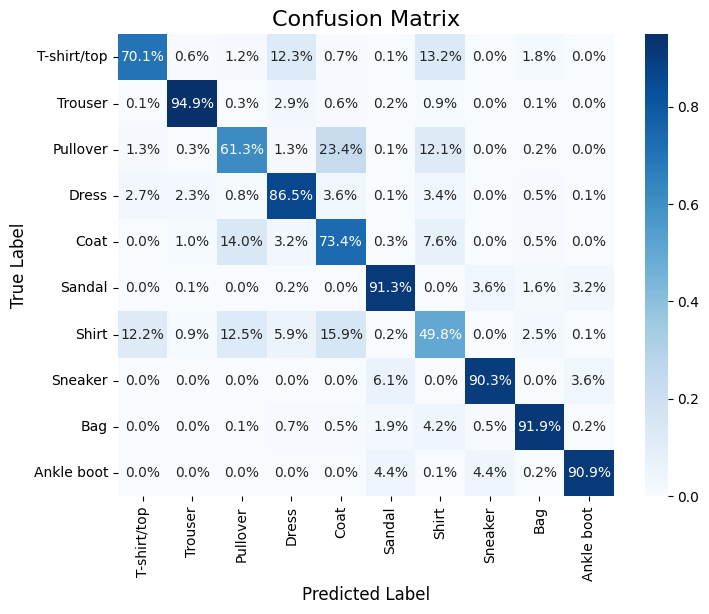

____________________________________________________________________________________________________


array([[701,   6,  12, 123,   7,   1, 132,   0,  18,   0],
       [  1, 949,   3,  29,   6,   2,   9,   0,   1,   0],
       [ 13,   3, 613,  13, 234,   1, 121,   0,   2,   0],
       [ 27,  23,   8, 865,  36,   1,  34,   0,   5,   1],
       [  0,  10, 140,  32, 734,   3,  76,   0,   5,   0],
       [  0,   1,   0,   2,   0, 913,   0,  36,  16,  32],
       [122,   9, 125,  59, 159,   2, 498,   0,  25,   1],
       [  0,   0,   0,   0,   0,  61,   0, 903,   0,  36],
       [  0,   0,   1,   7,   5,  19,  42,   5, 919,   2],
       [  0,   0,   0,   0,   0,  44,   1,  44,   2, 909]])

In [ ]:
make_confusion_matrix(test_labels,
           y_pred_model_14,
           class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

> **Note:** When working with images and other forms of visual data, its a good idea to visualize as muc as possible to develop a further understanding of the data and input and outputs of your own models

Make a function to:
* Plot a random image
* Make a prediction on said image
* Label the plot of true label and the predicted label

In [ ]:
import random

import numpy as np
import random
import matplotlib.pyplot as plt

def plot_random_image(model, images, true_labels, classes):
    """Picks a random image, plots it, and labels it with a prediction and truth label"""

    # 1. Set up a random integer (corrected index)
    i = random.randint(0, len(images) - 1)

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]

    # 2. Get the true label name without reassigning the original list
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the title depending on whether the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # 3. Get confidence as a number and format the label string correctly
    confidence = 100 * np.max(pred_probs)
    plt.xlabel(f"Pred: {pred_label} ({confidence:.0f}%) (True: {true_label})", color=color)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


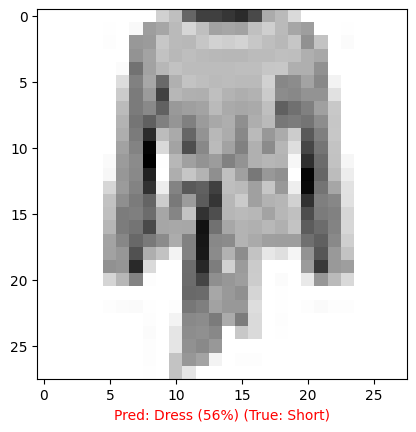

In [ ]:
# Check out random images as well as its predictions
plot_random_image(model = model_14,
         images = test_data_norm,
         true_labels = test_labels,
         classes = class_names)

## What pattern is our model learning

In [ ]:
# Find the layer of our most recent model
model_14.layers

[<Flatten name=flatten_4, built=True>,
 <Dense name=dense_37, built=True>,
 <Dense name=dense_38, built=True>,
 <Dense name=dense_39, built=True>]

In [ ]:
# Extract a particular layer
model_14.layers[1]

<Dense name=dense_37, built=True>

In [ ]:
# Get the patterns of a layer in our network
weight, biases = model_14.layers[1].get_weights()
weight,weight.shape

# shape = (784, 4) => 28*28 = 784 flattened shape of our input image

(array([[-0.5929241 ,  0.36605304, -0.5081575 ,  0.751998  ],
        [-1.3036627 ,  0.6704095 , -0.6913259 ,  1.2475482 ],
        [-1.1940391 ,  0.9648076 , -0.7399497 ,  0.79039365],
        ...,
        [ 0.12242448,  0.06532741, -0.5000838 ,  0.6306392 ],
        [ 0.8206598 , -0.46572104, -0.55639917,  0.7632551 ],
        [ 0.46604493,  0.19743228, -0.19945212,  0.23920605]],
       dtype=float32),
 (784, 4))

In [ ]:
model_14.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

Now let's check out the bias vector


In [ ]:
# Biases and its shape
biases, biases.shape

(array([-0.97914577,  1.1692145 , -0.70943713,  2.3147457 ], dtype=float32),
 (4,))

In [ ]:
# shape of biases and weight
biases.shape, weight.shape

((4,), (784, 4))

**Weights**

The weights matrix acts as a bridge between the input features and the layer's neurons. Its job is to connect every input feature to every neuron in the layer.Therefore, its shape must be: **(number_of_input_features, number_of_neurons)**
In your example, the input image is flattened to have 784 features.
The Dense layer you are inspecting has 4 neurons.
So, the weights matrix needs a shape of (784, 4) to connect each of the 784 input pixels to each of the 4 neurons.

**Biases**

The biases are added after the input has been multiplied by the weights. Each neuron gets its own independent bias value to shift its activation.
Therefore, the shape of the biases must be: **(number_of_neurons,)**
Since your layer has 4 neurons, you need 4 bias values—one for each neuron. This is why its shape is (4,).

In [ ]:
model_14.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

The None acts as a placeholder for the batch size dimension. When you actually train or run predictions with the model, TensorFlow will replace None with the number of samples in the specific batch you provide.

For example, for the dense_37 layer with an output shape of (None, 4):

If you feed it a batch of 32 images, the actual output shape for that batch will be (32, 4).

If you feed it a batch of 128 images, the actual output shape will be (128, 4).

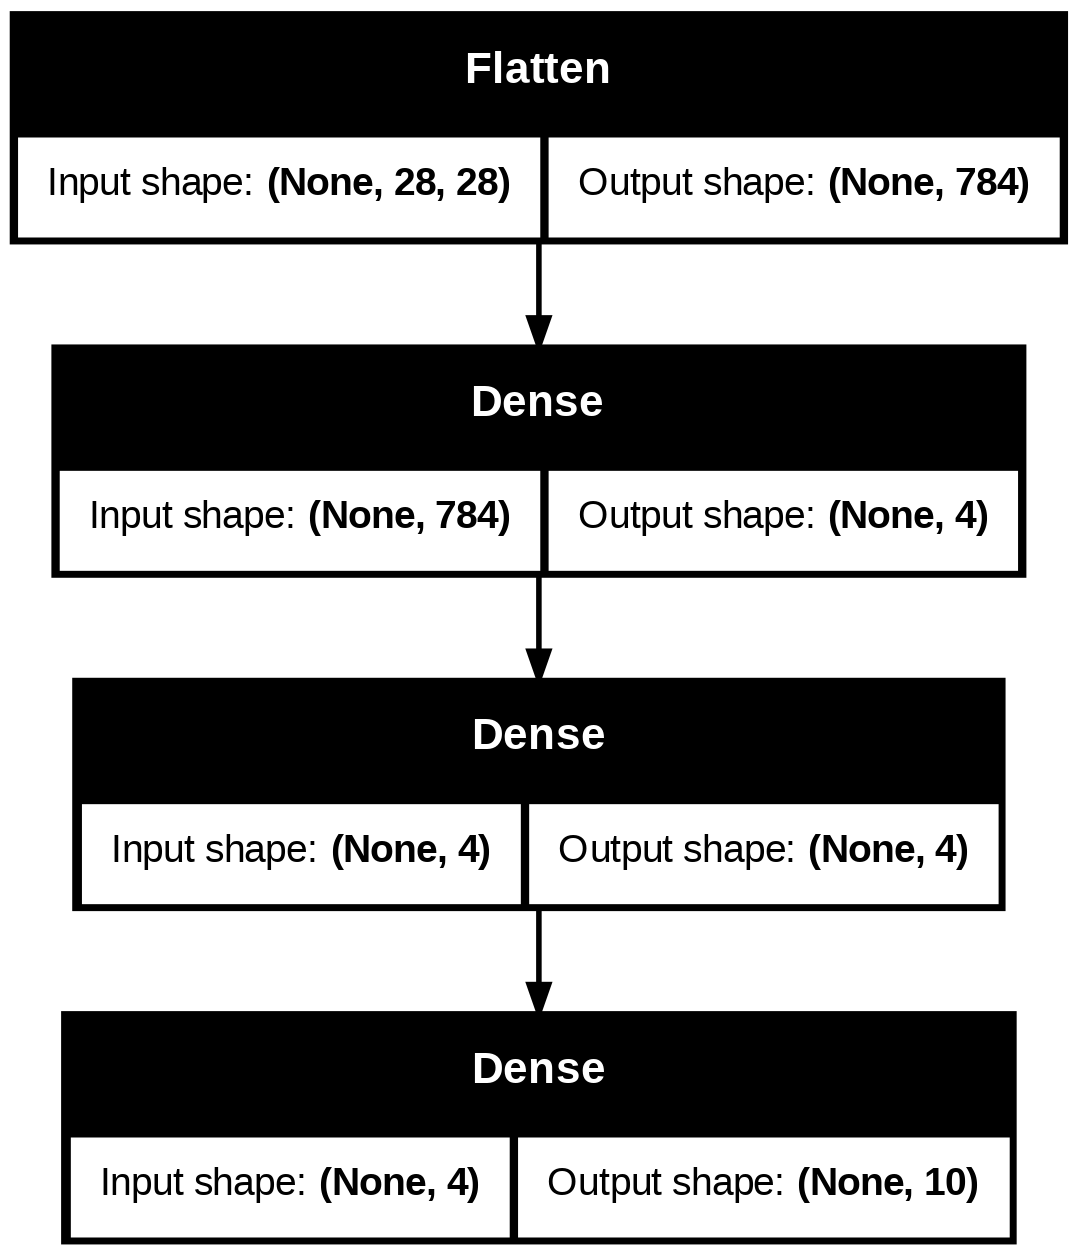

In [ ]:
# Let's check another way of viewing our deep learning model
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

## Extra resources

1. Neural network: https://www.youtube.com/watch?v=aircAruvnKk
2. Gradient descent: https://www.youtube.com/watch?v=IHZwWFHWa-w
3. Deep learning book: http://neuralnetworksanddeeplearning.com/chap1.html